# Importing Libraries

In [1]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Loading the model

In [2]:
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
model = load_model("faceMaskRecodModel.h5")

# A function to work with images

In [3]:
def image_face_mask_detector(image_path):
    frame = cv2.imread(image_path)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(60, 60),flags=cv2.CASCADE_SCALE_IMAGE)

    for (x, y, w, h) in faces:
        face_frame = frame[y:y+h, x:x+w]
        face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
        face_frame = cv2.resize(face_frame, (224, 224))
        face_frame = img_to_array(face_frame)
        face_frame = np.expand_dims(face_frame, axis=0)
        face_frame = preprocess_input(face_frame)

        preds = model.predict(face_frame)
        (mask, withoutMask) = preds[0]

        if (mask > withoutMask):
            label="Mask"
            color = (0, 255, 0)
        else:
            label = "No Mask"
            color = (0, 0, 255)
        
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
        cv2.putText(frame, label, (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 3)

    return frame


# A function for Real-time detection

In [4]:
def video_face_mask_detector(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1, minNeighbors=5, minSize=(60, 60), flags=cv2.CASCADE_SCALE_IMAGE)

    for (x, y, w, h) in faces:
        face_frame = frame[y:y+h, x:x+w]
        face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
        face_frame = cv2.resize(face_frame, (224, 224))
        face_frame = img_to_array(face_frame)
        face_frame = np.expand_dims(face_frame, axis=0)
        face_frame = preprocess_input(face_frame)

        preds = model.predict(face_frame)
        (mask, withoutMask) = preds[0]

        if (mask > withoutMask):
            label="Mask"
            color = (0, 255, 0)
        else:
            label = "No Mask"
            color = (0, 0, 255)
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

        cv2.putText(frame, label, (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 3)

    cv2.imshow('Face Mask Detection', frame)
    return frame

# Testing some Images

1/1 [==============================] - 0s 55ms/step


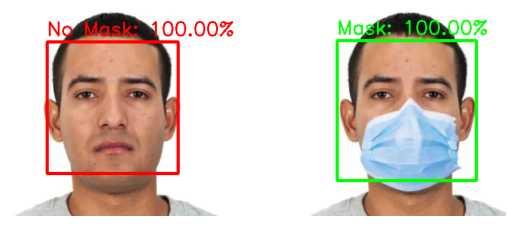

In [5]:
img = image_face_mask_detector("test1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 46ms/step


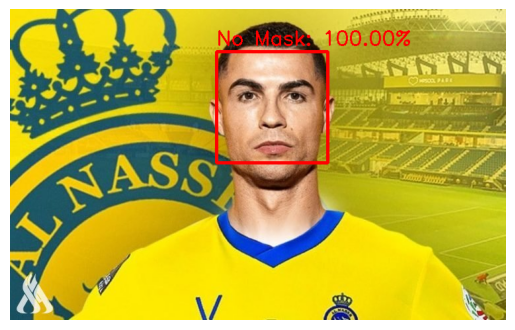

In [6]:
img = image_face_mask_detector("test2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 43ms/step


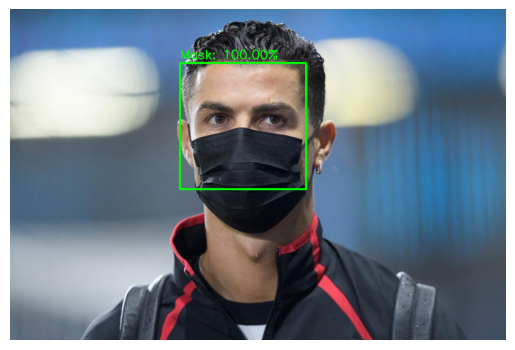

In [7]:
img = image_face_mask_detector("test3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 41ms/step


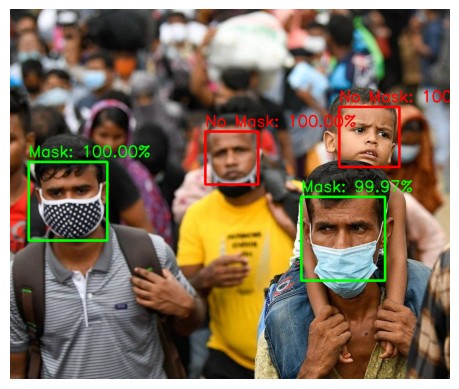

In [8]:
img = image_face_mask_detector("test4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

# Real-time face mask detection

In [11]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    output = video_face_mask_detector(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 79ms/step
